In [1]:
using DelimitedFiles: readdlm
using Plots
using PyPlot
using DSP
using PyCall

In [2]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\volkan\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

In [3]:
acc_data = readdlm("acc_data.txt", '\n', Float64);
acc_data = reshape(acc_data, size(acc_data,1)); fs = 10000;
acc_data2 = readdlm("acc_data2.txt", '\n', Float64);
acc_data2 = reshape(acc_data2, size(acc_data2,1));
acc_data3 = readdlm("acc_data3.txt", '\n', Float64);
acc_data3 = reshape(acc_data3, size(acc_data3,1));

In [14]:
function plot_spectrogram(data, fs)

    pyplot()
    Pxx, freqs, bins, im = specgram(data, NFFT = 500, noverlap = 100, Fs = fs, window = np.hamming(500))
    return Pxx, freqs, bins, im
end

plot_spectrogram (generic function with 1 method)

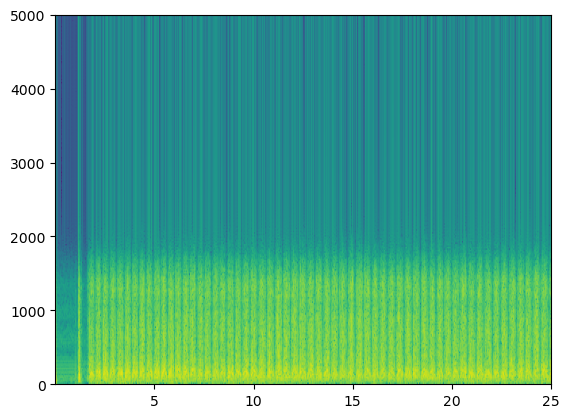

([9.032423509417519e-5 2.0820914193300228e-5 … 1.8251113279758624e-6 3.0096527976919284e-6; 0.0001365894071730049 0.0002818147700983848 … 8.617631356127754e-6 4.429530740871576e-6; … ; 9.492906547108109e-12 2.357613281847692e-13 … 3.4751607679905747e-13 4.912277043154826e-11; 4.752151704520828e-12 1.1246826042692956e-13 … 1.763972957871414e-13 2.4527974010602018e-11], [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0  …  4820.0, 4840.0, 4860.0, 4880.0, 4900.0, 4920.0, 4940.0, 4960.0, 4980.0, 5000.0], [0.025, 0.065, 0.105, 0.145, 0.185, 0.225, 0.265, 0.305, 0.345, 0.385  …  24.625, 24.665, 24.705, 24.745, 24.785, 24.825, 24.865, 24.905, 24.945, 24.985], PyObject <matplotlib.image.AxesImage object at 0x000000004208E880>)

In [15]:
Pxx, freqs, bins, _ = plot_spectrogram(acc_data, fs)


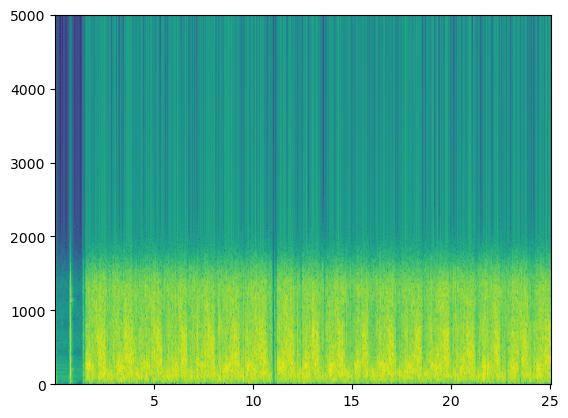

([8.983120989396832e-5 2.0525894506819812e-5 … 5.282659223432323e-7 2.622855196497274e-6; 0.00013440847313701403 0.00027445740220696677 … 1.2317794768383027e-5 5.094602227515803e-6; … ; 9.747491526468899e-12 6.843428311446416e-16 … 1.3327295942990597e-9 1.1594685684071809e-10; 4.8608994936044186e-12 2.652137745558139e-16 … 6.665336985619922e-10 5.799525092559522e-11], [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0  …  4820.0, 4840.0, 4860.0, 4880.0, 4900.0, 4920.0, 4940.0, 4960.0, 4980.0, 5000.0], [0.025, 0.065, 0.105, 0.145, 0.185, 0.225, 0.265, 0.305, 0.345, 0.385  …  24.705, 24.745, 24.785, 24.825, 24.865, 24.905, 24.945, 24.985, 25.025, 25.065], PyObject <matplotlib.image.AxesImage object at 0x000000002310CE50>)

In [16]:
Pxx2, freqs2, bins2, _ = plot_spectrogram(acc_data2, fs)


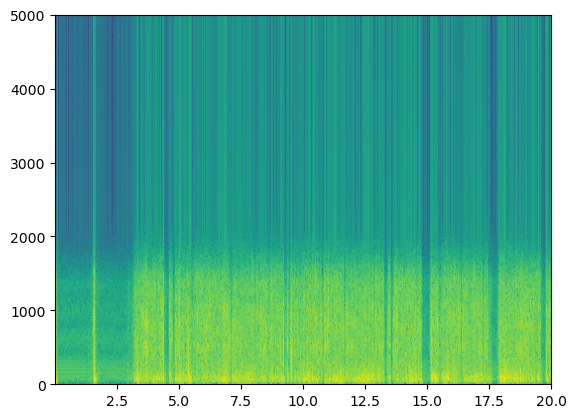

([9.038961268768081e-5 2.1015150364918407e-5 … 6.5695796779616076e-9 4.2834323361488516e-7; 0.00013590029419166972 0.00028127630970754174 … 3.8368553656801494e-8 1.9601990103865205e-6; … ; 9.495583817667096e-12 7.418432549804225e-15 … 5.426836703871408e-16 2.272730705104936e-11; 4.756544276308363e-12 3.5200868199684615e-15 … 9.450567197049557e-17 1.1417822119136181e-11], [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0  …  4820.0, 4840.0, 4860.0, 4880.0, 4900.0, 4920.0, 4940.0, 4960.0, 4980.0, 5000.0], [0.025, 0.065, 0.105, 0.145, 0.185, 0.225, 0.265, 0.305, 0.345, 0.385  …  19.625, 19.665, 19.705, 19.745, 19.785, 19.825, 19.865, 19.905, 19.945, 19.985], PyObject <matplotlib.image.AxesImage object at 0x0000000022FE7490>)

In [17]:
Pxx3, freqs3, bins3, _ = plot_spectrogram(acc_data3, fs)


In [26]:
@show [size(Pxx), size(freqs), size(bins)] 

[size(Pxx), size(freqs), size(bins)] = Tuple{Int64,Vararg{Int64,N} where N}[(251, 625), (251,), (625,)]


3-element Array{Tuple{Int64,Vararg{Int64,N} where N},1}:
 (251, 625)
 (251,)
 (625,)

In [27]:
data_out = Pxx[1:50, :]

50×625 Array{Float64,2}:
 9.03242e-5   2.08209e-5   …  1.09157e-8  1.82511e-6  3.00965e-6
 0.000136589  0.000281815     2.97686e-6  8.61763e-6  4.42953e-6
 3.48841e-6   0.000168899     7.26464e-6  1.69855e-5  1.66733e-5
 0.000230626  5.43675e-6      7.13437e-6  2.64109e-5  2.64959e-5
 0.00041637   3.17695e-5      2.41108e-5  5.5043e-6   4.04398e-5
 0.000580155  3.36819e-5   …  1.82416e-5  3.10221e-6  3.01876e-5
 0.000914536  8.53135e-7      1.07236e-7  2.54724e-5  9.56299e-5
 0.000869912  2.89139e-6      7.94945e-7  2.6648e-6   0.000116908
 0.000620706  6.07935e-7      1.45817e-7  8.57347e-7  9.9164e-6
 0.000458367  3.09569e-7      1.31554e-6  2.7246e-6   3.55039e-5
 0.000368848  2.05785e-6   …  3.77297e-8  1.08242e-6  1.9136e-5
 0.00027289   2.89641e-7      1.45998e-8  1.19199e-6  2.12873e-5
 0.000211526  3.56321e-7      5.28643e-8  5.5014e-6   3.76141e-5
 ⋮                         ⋱                          
 1.1939e-5    5.46233e-8      5.58751e-8  4.79799e-7  5.36657e-7
 1.20487e-5